In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.stats import chi2_contingency as chisquare
import numpy as np
import skimage
import os
import sys
import pandas as pd
from PIL import Image as pil_img

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

import configparser

sys.path.append(os.path.abspath('../Module'))
import preprocessing
import visualize

Using TensorFlow backend.


In [2]:
config = configparser.ConfigParser()
config.read('../config.ini')

vg_json = config['PATHS']['vg-json']
vg_json_export = config['PATHS']['json-export']
image_dir = config['PATHS']['vg-images']

data_dir = vg_json_export + 'extracted_data/'

In [3]:
objects = pd.read_csv(data_dir+"all_objects.csv", index_col=0)

In [12]:
vgg_model = VGG16()

In [4]:
resnet_model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 9s 0us/step


In [71]:
sample_image = objects.sample(1).iloc[0]
filename = image_dir + str(sample_image.image_id) + '.jpg'

# Bounding Box
bb ={
    'h' : sample_image.bb_h,
    'w' : sample_image.bb_w,
    'x' : sample_image.bb_x,
    'y' : sample_image.bb_y,
    'label' : sample_image.color+' '+sample_image.object_name
}

img = skimage.io.imread(filename)

img = img[bb['y']:bb['y']+bb['h'], bb['x']:bb['x']+bb['w']]

img_pil = pil_img.fromarray(img)
img_pil = img_pil.resize((224,224))

print (bb['label'])
plt.imshow(img)

black hat


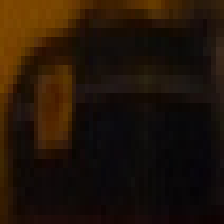

In [72]:
img_pil

In [73]:
x = image.img_to_array(img_pil)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = vgg_model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
for pred in decode_predictions(preds, top=3)[0]:
    print (pred)

('n04239074', 'sliding_door', 0.04544122)
('n02870880', 'bookcase', 0.04343156)
('n03761084', 'microwave', 0.039695006)


In [16]:
preds

array([[1.70538740e-07, 9.16042950e-07, 1.07156768e-06, 2.78769062e-06,
        3.66099357e-06, 4.97192104e-07, 2.52678536e-08, 1.82421525e-06,
        6.45643183e-07, 9.12801994e-08, 4.52887932e-08, 7.49585496e-08,
        1.71779121e-07, 1.86068519e-07, 1.54587568e-07, 6.74694149e-08,
        1.14352979e-07, 6.73272723e-07, 2.01728380e-06, 9.68507265e-07,
        9.45207887e-07, 3.13320001e-08, 1.92445142e-07, 5.15410875e-07,
        1.10284432e-07, 1.93599504e-07, 1.71643521e-07, 1.11110403e-07,
        1.47355792e-07, 4.13551697e-06, 3.62898511e-08, 1.32023018e-07,
        3.92941821e-08, 9.01238764e-08, 2.88845598e-07, 1.06573552e-07,
        1.25288977e-06, 2.91160774e-07, 1.79715414e-07, 2.36924893e-06,
        1.66562174e-07, 1.06421609e-07, 2.82558972e-07, 1.43752857e-07,
        5.47451407e-07, 2.46053787e-07, 4.91860078e-07, 4.05225165e-07,
        4.02919227e-07, 4.57242692e-07, 1.07728624e-06, 1.36840417e-05,
        7.60771741e-07, 4.68529379e-07, 6.35602476e-07, 2.069060